## Preprocessing

In [20]:
!pip install matplotlib

In [21]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import setuptools
import pathlib
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [22]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME', 'STATUS'], inplace = True)

In [23]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [24]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   INCOME_AMT              34299 non-null  object
 6   SPECIAL_CONSIDERATIONS  34299 non-null  object
 7   ASK_AMT                 34299 non-null  int64 
 8   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


In [25]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df_vc_app_type = application_df['APPLICATION_TYPE'].value_counts()
df_vc_app_type

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [26]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = df_vc_app_type[df_vc_app_type < 500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [27]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df_vc_clss_type = application_df['CLASSIFICATION'].value_counts()
df_vc_clss_type

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [28]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df_vc_clss_type_gt1 = df_vc_clss_type[df_vc_clss_type > 1]
df_vc_clss_type_gt1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [29]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = df_vc_clss_type[df_vc_clss_type < 500].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64

In [30]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT',
       'IS_SUCCESSFUL'],
      dtype='object')

In [31]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_from = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']
df_dummies = pd.get_dummies(application_df[dummies_from])
df_dummies.head(3)

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


## correlation plot indicates generally poor correlation in onehot encoded vectors 
More columns do not need removal

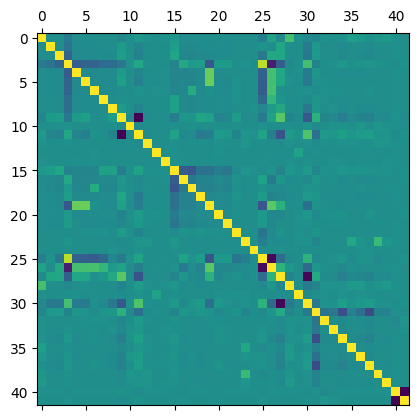

In [32]:

plt.matshow(df_dummies.corr())
plt.show()

In [33]:
non_dummies = ['ASK_AMT']
df_non_dummies = application_df[non_dummies]
df_non_dummies.head(3)

,ASK_AMT
0,5000
1,108590
2,5000


In [34]:
# Split our preprocessed data into our features and target arrays
X = pd.concat([df_non_dummies, df_dummies], axis=1)

y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=12, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [38]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.6423 - loss: 0.6447
Epoch 2/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.7323 - loss: 0.5546
Epoch 3/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.7312 - loss: 0.5530
Epoch 4/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.7266 - loss: 0.5540
Epoch 5/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.7313 - loss: 0.5536
Epoch 6/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.7248 - loss: 0.5572
Epoch 7/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.7301 - loss: 0.5503
Epoch 8/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.7343 - loss: 0.5484
Epoch 9/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.7301 - loss: 0.5533
Epoch 10/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.7311 - loss: 0.5473
Epoch 11/150
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.7337 - loss: 0.5449
Epoch 12/150
804/80

In [39]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 376us/step - accuracy: 0.7336 - loss: 0.5466
Loss: 0.5466247797012329, Accuracy: 0.7336443066596985


# Manual optimization review

## Additional dropped columns

Status dropped due to extemely low support values.

Dropping special_considerations reduced accuracy signifcantly (0.01). Dropping other columns were worse.

Classifcation binning from < 500 to < 1000 or < 250 reduced perf by 0.01

Application type binning from 500 to 1000 reduced perf by 0.008

## Activations

* relu - best in single later 0.735
* tanh - good but relu outperforms 0.730

## Layers and units

* single layer best accuracy was 0.735, 8 units relu
* 8 neurons perform better than 4 or 16 in single layer
* 4, 16 unit additional layer performed worse when paired with 8 layers before or after.
* single 64 unit layer acc: 0.731

## Epochs
Tested 25, 50, 100, 150, and 250 with a 8-8 2 hidden layer relu model. 150 was best.

## Best accuracy
* 16-12 relu functioned best so far. 0.738

# Automated optimazation

In [40]:
def create_model(hp):
    model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activations = hp.Choice('activation',['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    hp_units1 = hp.Int('units_1', min_value = 64, max_value = 256, step = 32)
    model.add(tf.keras.layers.Dense(units=hp_units1, activation=hp.Choice('activation',['relu','tanh', 'sigmoid'])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    hp_units2 = hp.Int('units_2', min_value = 16, max_value = 64, step = 8)
    model.add(tf.keras.layers.Dense(units=hp_units2, activation=hp.Choice('activation',['relu','tanh', 'sigmoid'])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    hp_units2 = hp.Int('units_2', min_value = 4, max_value = 10, step = 2)
    model.add(tf.keras.layers.Dense(units=hp_units2, activation=hp.Choice('activation',['relu','tanh', 'sigmoid'])))

    # Add the final layer, for binary classifcation
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))#hp.Choice('activation',['sigmoid','softmax'])))

    # Compile the model
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return model

In [41]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2
)

In [42]:
tuner.search(X_train_scaled, y_train, epochs=150, validation_data=(X_test_scaled, y_test))

Trial 91 Complete [00h 00m 03s]
val_accuracy: 0.734810471534729

Best val_accuracy So Far: 0.7380757927894592
Total elapsed time: 00h 03m 34s


In [43]:
top_models = tuner.get_best_models(3)
for model in top_models:
    model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
    print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

/home/mox/Documents/coding_projects/bootcamp_local/Homeworks/deep-learning-challenge/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


268/268 - 0s - 565us/step - accuracy: 0.7381 - loss: 0.5462
Loss: 0.546167254447937, Accuracy: 0.7380757927894592
268/268 - 0s - 586us/step - accuracy: 0.7380 - loss: 0.5470
Loss: 0.5470191240310669, Accuracy: 0.7379592061042786
268/268 - 0s - 538us/step - accuracy: 0.7378 - loss: 0.5482
Loss: 0.5482425689697266, Accuracy: 0.7378425598144531


In [44]:
top_model = tuner.get_best_models(1)[0]

In [45]:
model_loss, model_accuracy = top_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 0s - 701us/step - accuracy: 0.7381 - loss: 0.5462
Loss: 0.546167254447937, Accuracy: 0.7380757927894592


In [46]:
top_hyper = tuner.get_best_hyperparameters(1)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'units_1': 96, 'units_2': 56, 'tuner/epochs': 3, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}


# Run One more attempt with checkpoints and callbacks

and much larger neuron counts

In [47]:
nn_tuned = tf.keras.models.Sequential()

# First hidden layer
nn_tuned.add(tf.keras.layers.Dense(units=256, activation="relu"))

# First hidden layer
nn_tuned.add(tf.keras.layers.Dense(units=128, activation="relu"))

# Second hidden layer
nn_tuned.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Third hidden layer
nn_tuned.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn_tuned.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_tuned.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compile the model
nn_tuned.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
checkpoint_path = "training/cp.weights.h5"
checkpoint_dir = pathlib.Path.cwd() / checkpoint_path

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_freq='epoch',
                                                 verbose=1)

# Epochs reduced

75 epochs gives a 0.03% reduction in performance compared to 150.

In [50]:
# Train the model
fit_model_tuned = nn_tuned.fit(X_train_scaled, 
                               y_train, 
                               epochs=75, 
                               callbacks=[cp_callback])

Epoch 1/75
699/804 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7108 - loss: 0.5870
Epoch 1: saving model to training/cp.weights.h5
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.7124 - loss: 0.5847
Epoch 2/75
748/804 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7255 - loss: 0.5600
Epoch 2: saving model to training/cp.weights.h5
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.7256 - loss: 0.5598
Epoch 3/75
802/804 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.7306 - loss: 0.5559
Epoch 3: saving model to training/cp.weights.h5
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.7306 - loss: 0.5559
Epoch 4/75
797/804 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.7290 - loss: 0.5508
Epoch 4: saving model to training/cp.weights.h5
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.7290 - loss: 0.5508
Epoch 5/75
786/804 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.7264 - loss: 0.5526
Epoch 5: saving model to training/cp.weights.h5
804/804 ━━━━

In [51]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_tuned.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 497us/step - accuracy: 0.7354 - loss: 0.5576
Loss: 0.5576093196868896, Accuracy: 0.7353935837745667


In [52]:
# Export our model to HDF5 file
export_name = "AlphabetSoupCharity.h5"
nn_tuned.save(export_name, overwrite=True)